In [1]:
import colour
import numpy as np

In [2]:
# %matplotlib widget
%matplotlib inline

# LMS Colour Matching Functions

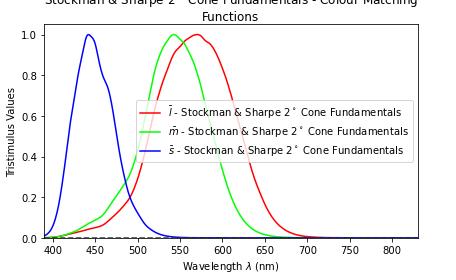

In [34]:
fig,ax = colour.plotting.plot_single_cmfs(colour.colorimetry.MSDS_CMFS_LMS['Stockman & Sharpe 2 Degree Cone Fundamentals'])

# CIE RGB Colour Matching Functions

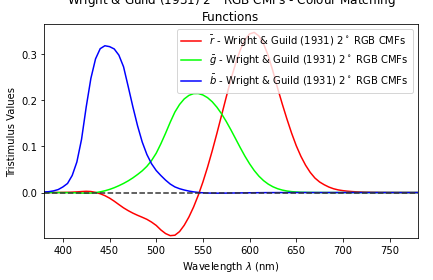

In [3]:
fig,ax = colour.plotting.plot_single_cmfs(colour.colorimetry.MSDS_CMFS_RGB['Wright & Guild 1931 2 Degree RGB CMFs'])

# CIE XYZ Colour Matching Functions

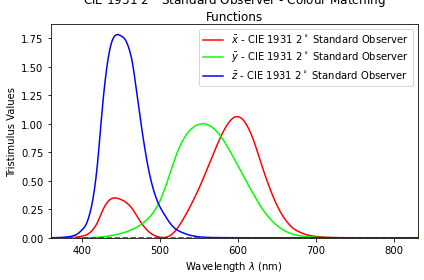

In [4]:
fig,ax = colour.plotting.plot_single_cmfs(colour.colorimetry.MSDS_CMFS['CIE 1931 2 Degree Standard Observer'])

[ 0.31270775  0.32911283]


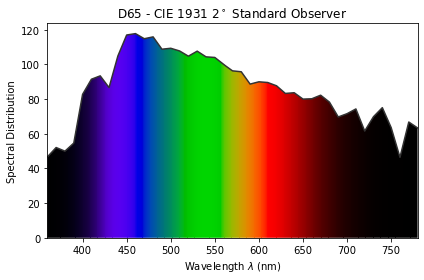

In [5]:
d65_xy = colour.temperature.CCT_to_xy_CIE_D(6504.38938305)
print(d65_xy)
fig,ax = colour.plotting.plot_single_sd(colour.SDS_ILLUMINANTS['D65'])

# CIE Luminous Efficiency Function for Photopic Vision

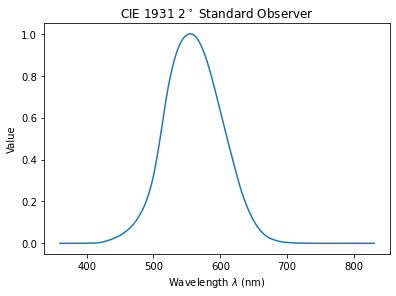

In [6]:
from matplotlib import pyplot as plt
import numpy as np
v_lambda = colour.colorimetry.SDS_LEFS_PHOTOPIC['cie_2_1924']
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_title('CIE 1931 2$^\\circ$ Standard Observer')
ax.set_xlabel('Wavelength $\\lambda$ (nm)')
ax.set_ylabel('Value')
ax.plot(np.arange(360,831,1),v_lambda.values)

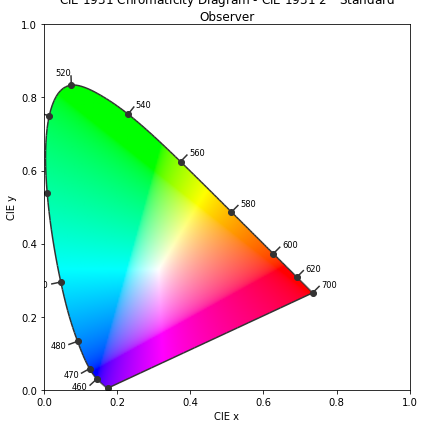

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

In [7]:
colour.plotting.diagrams.plot_chromaticity_diagram()

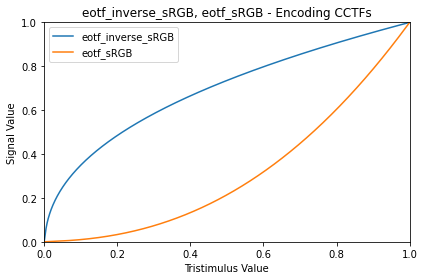

RGB_to_XYZ
 [[ 0.4124  0.3576  0.1805]
 [ 0.2126  0.7152  0.0722]
 [ 0.0193  0.1192  0.9505]]


In [8]:
sRGB = colour.RGB_COLOURSPACES["sRGB"]
colour.plotting.plot_multi_cctfs([sRGB.cctf_encoding,sRGB.cctf_decoding])
print("RGB_to_XYZ\n",sRGB.matrix_RGB_to_XYZ)

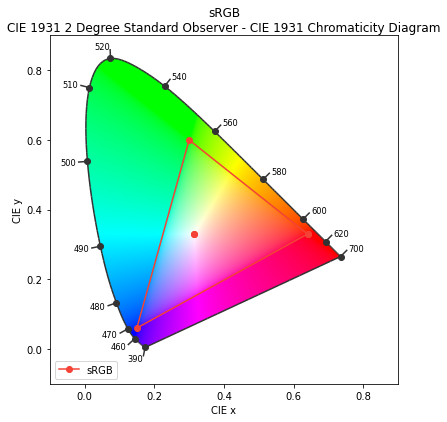

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [9]:
colour.plotting.plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(sRGB)

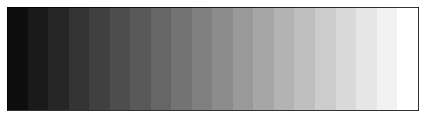

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [10]:
srgb_colours = [ 
    np.array([d,d,d])
    for d in np.arange(0.05,1.05,0.05)
]

colour.plotting.plot_multi_colour_swatches(srgb_colours,height=50,width=10)         

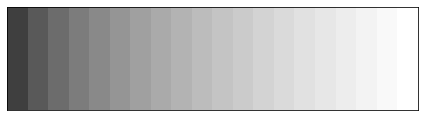

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [11]:
linear_srgb_colours = [ 
    sRGB.cctf_encoding(np.array([d,d,d]))
    for d in np.arange(0.05,1.05,0.05)
]

colour.plotting.plot_multi_colour_swatches(linear_srgb_colours,height=50,width=10)      

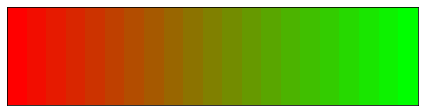

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [35]:
# from (1,0,0) to (0,1,0)
start = np.array([1,0,0])
end = np.array([0,1,0])

def lerp(a,b,t):
    return (1-t) * a + t * b

step = 0.05

colour_gradients = [lerp(start,end,t) for t in np.arange(0,1+step,step)]

colour.plotting.plot_multi_colour_swatches(colour_gradients,height=50,width=10)

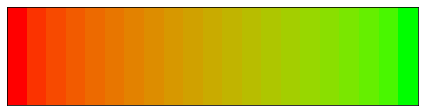

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [37]:
def CIE_Lab_to_sRGB(c):
    return colour.XYZ_to_sRGB(colour.Lab_to_XYZ(c))

def sRGB_to_CIE_Lab(c):
    return colour.XYZ_to_Lab(colour.sRGB_to_XYZ(c))

lab_start = sRGB_to_CIE_Lab(start)

lab_end = sRGB_to_CIE_Lab(end)

# the b indicates the gradients between cyan to yellow
lab_colour_gradients = [CIE_Lab_to_sRGB(lerp(lab_start,lab_end,t)) for t in np.arange(0,1+step,step) ]
colour.plotting.plot_multi_colour_swatches(lab_colour_gradients,height=50,width=10)

In [15]:
def xy_to_XYZ(p):
    return np.array([p[0],p[1],1-np.sum(p)])

w = np.array([0.3127,0.3290])
r = np.array([0.64,0.33])
g = np.array([0.3,0.6])
b = np.array([0.15,0.06])

m1 = np.array([
    xy_to_XYZ(r),
    xy_to_XYZ(g),
    xy_to_XYZ(b),
]).T

s = 1.0/w[1] * np.linalg.inv(m1) @ xy_to_XYZ(w)

m = s * m1

# m = np.array([
#     s[0] * xy_to_XYZ(r),
#     s[1] * xy_to_XYZ(g),
#     s[2] * xy_to_XYZ(b)
# ]).T

print(m)

[[ 0.4123908   0.35758434  0.18048079]
 [ 0.21263901  0.71516868  0.07219232]
 [ 0.01933082  0.11919478  0.95053215]]


In [16]:
import colour
sRGB = colour.RGB_COLOURSPACES['sRGB']
print(sRGB.matrix_RGB_to_XYZ)

[[ 0.4124  0.3576  0.1805]
 [ 0.2126  0.7152  0.0722]
 [ 0.0193  0.1192  0.9505]]


[[ 0.          0.          0.        ]
 [ 0.18048079  0.07219232  0.95053215]
 [ 0.35758434  0.71516868  0.11919478]
 [ 0.53806513  0.78736099  1.06972693]
 [ 0.4123908   0.21263901  0.01933082]
 [ 0.59287159  0.28483132  0.96986297]
 [ 0.76997514  0.92780768  0.1385256 ]
 [ 0.95045593  1.          1.08905775]]
(8, 3)
[ 0.          0.18048079  0.35758434  0.53806513  0.4123908   0.59287159
  0.76997514  0.95045593]


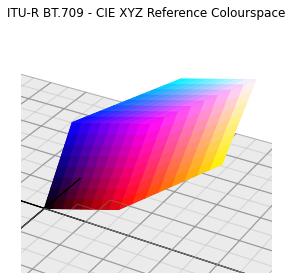

Text(0.5, 0, 'z')

In [17]:
cube = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
])

cube = (m @ cube.T).T

print(cube)

top = np.array([
    cube[2],cube[6],
    cube[6],cube[7],
    cube[7],cube[3],
    cube[3],cube[2],
])

mid1 = np.array([
    cube[0],cube[2],
])

mid2 = np.array([
    cube[4],cube[6],
])

mid3 = np.array([
    cube[5],cube[7],
])

mid4 = np.array([
    cube[1],cube[3],
])

bottom = np.array([
    cube[0],cube[4],
    cube[4],cube[5],
    cube[5],cube[1],
    cube[1],cube[0],
])

print(cube.shape)
print(cube[:,0])

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

fig,ax = colour.plotting.plot_RGB_colourspaces_gamuts(['ITU-R BT.709'],'CIE XYZ')

ax.plot(top[:,0],top[:,1],top[:,2],'bo')
ax.plot(mid1[:,0],mid1[:,1],mid1[:,2],'bo')
ax.plot(mid2[:,0],mid2[:,1],mid2[:,2],'bo')
ax.plot(mid3[:,0],mid3[:,1],mid3[:,2],'bo')
ax.plot(mid4[:,0],mid4[:,1],mid4[:,2],'bo')
ax.plot(bottom[:,0],bottom[:,1],bottom[:,2],'bo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# integral by summation

In [18]:
REF = 106.7502593994140625

def integral_discrete(x,y):
    h = y[1:] + y[:-1]
#     print(h)
    w = x[1:] - x[:-1]
#     print(w)
    return np.sum(h*w*0.5)

integral_discrete(v_lambda.wavelengths,v_lambda.values)

106.8569149167669

# SPD to XYZ

In [33]:
wavelengths = np.array([400,500,600,700])
values = np.array([0,8,15.6,18.4])
# values *= 1.0 / 106.7502593994140625

print(values)

sd = colour.SpectralDistribution(dict(zip(wavelengths,values)),interpolator=colour.LinearInterpolator)
shape = colour.SpectralShape(400,700,1)
cmfs = colour.MSDS_CMFS['CIE 1931 2 Degree Standard Observer']
illuminant = colour.SDS_ILLUMINANTS['D65']
sd = colour.colorimetry.reshape_sd(sd,cmfs=cmfs,illuminant=illuminant,shape=shape)
# print(colour.get_domain_range_scale())
with colour.domain_range_scale('1'):
    xyz = colour.sd_to_XYZ(sd,method='Integration')
t = colour.XYZ_to_sRGB(xyz,apply_cctf_encoding=False)
rgb = np.array([20.71150083,10.85663047,2.7710096])
print(t / rgb)

[  0.    8.   15.6  18.4]
[ 1.00385308  0.99924752  0.99975797]


In [25]:
import colour
import numpy as np
from matplotlib import pyplot as plt
import mitsuba
mitsuba.set_variant('scalar_rgb')

color = np.array([0.0,0.0,0.0])

steps = 1000
wavelengths = np.array([400,500,600,700])
# [0.0,0.0749412701,0.146135479,0.17236492]
values = np.array([0,8,15.6,18.4])

MTS_CIE_Y_NORMALIZATION = 1.0 / 106.7502593994140625
values *= MTS_CIE_Y_NORMALIZATION

print(values)

MTS_WAVELENGTH_MIN = 360.0
MTS_WAVELENGTH_MAX = 830.0
MTS_CIE_SAMPLES = 95

for i in range(steps):
    x = MTS_WAVELENGTH_MIN + (i/float(steps-1)) * \
    (MTS_WAVELENGTH_MAX - MTS_WAVELENGTH_MIN)
    if x < wavelengths[0] or x > wavelengths[-1]:
        continue
    index = np.searchsorted(wavelengths, x, 'left')
    x0 = wavelengths[index-1]
    x1 = wavelengths[index]
    y0 = values[index-1]
    y1 = values[index]
    y = (x*y0 - x1*y0 - x*y1 + x0*y1) / (x0 - x1)
    xyz = mitsuba.core.cie1931_xyz(x)
    color += xyz * y

color *= (MTS_WAVELENGTH_MAX - MTS_WAVELENGTH_MIN) / float(steps)
# color = mitsuba.core.xyz_to_srgb(color)
color = colour.XYZ_to_sRGB(color,apply_cctf_encoding=False)
print(color)

[ 0.          0.07494127  0.14613548  0.17236492]
[ 20.71150083  10.85663047   2.7710096 ]


# XYZ to SPD

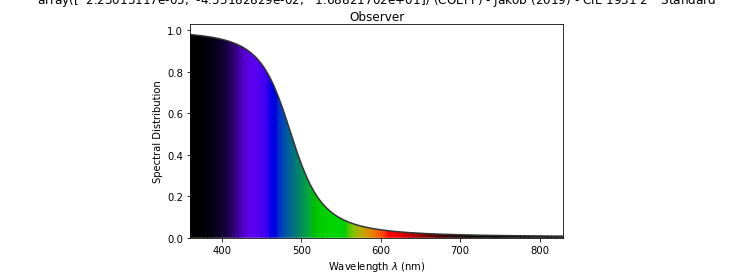

array([-0.0136479 ,  0.34510736,  0.90504303])

In [88]:
c_srgb = np.array([-0.014, 0.345, 0.905])
c_xyz = colour.sRGB_to_XYZ(c_srgb)
cmfs = (
    colour.MSDS_CMFS['CIE 1931 2 Degree Standard Observer'].
    copy().align(colour.SpectralShape(360, 830, 5))
)
illuminant = colour.SDS_ILLUMINANTS['E'].copy().align(cmfs.shape)
sd = colour.recovery.XYZ_to_sd_Jakob2019(c_xyz,cmfs,illuminant)
colour.plotting.plot_single_sd(sd)

colour.XYZ_to_sRGB(colour.sd_to_XYZ(sd)/100)

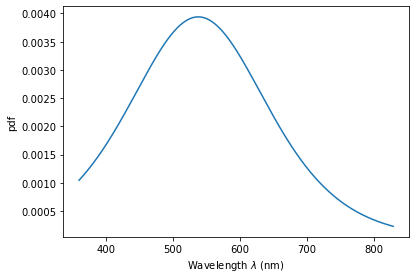

In [68]:
# pdf

wavelengths = np.arange(360,830,1)

value = []

for i in wavelengths:
    tmp = 1.0 / np.cosh(0.0072 * (i-538.0))
    value.append(0.003939804229326285 * tmp * tmp)

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_xlabel('Wavelength $\\lambda$ (nm)')
ax.set_ylabel('pdf')
ax.plot(wavelengths,value)